# Milestone 2: Cleaning/Formatting Flat File Source

For my project, I chose daily historical stock price data as my flat source. This data is available on a number of different websites, but I'll be using the historical download section of Yahoo Finance to download the raw CSV files needed to make this project work.

!["Amazon Stock Price"](yahoo_amzn.jpg)

Yahoo allows visitors to download raw stock price data from their website. Users can input their time period of choice, whether or not they want to see stock splits or dividend data, and the frequency at which they want the data to be presented. 


I'll first design a class that allows a user to extract the data from Yahoo Finance using `pd.read_csv`.

## Building a class to pull data from Yahoo Finance

In [1]:
import pandas as pd
import datetime

class Ticker():
    def __init__(self, 
                 ticker, 
                 start = '1/1/1900', 
                 end = datetime.date.today().strftime('%m/%d/%Y') , 
                 freq = "d"):
        
        # Defining the ticker
        self.ticker = ticker
        # Defining the type of data to collect
        self.freq = freq
        # Defining the url to query
        self.url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1{}&events=history&includeAdjustedClose=true"
        # Defining the starting timestamp
        # Since many companies went public before 1970, I need a method to convert the date into a negative timestamp
        # TODO // Fix this mess. Not sure if I should use a constructor or not?
        # Start Time
        epoch = datetime.datetime(1970, 1, 1)  # calculate the epoch timestamp 
        month, day, year = start.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.start = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        # End Time
        month, day, year = end.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.end = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        
    def get_price(self):
        stock_price = pd.read_csv(self.url.format(self.ticker,
                                                  self.start,
                                                  self.end,
                                                  self.freq), index_col=0)
        
        stock_price['PctChange'] = stock_price['Adj Close'].pct_change()
        
        # This is broken. It returns values less than -100% which should be impossible unless I messed something else up
        # So let's say a stock drops 50% twice in a row. cumsum() will return -100% but the real value is -75%
        stock_price['CumulativePctChange'] = stock_price['Adj Close'].pct_change().cumsum() 
        
        stock_price['Ticker'] = self.ticker
        
        cols = stock_price.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        stock_price = stock_price[cols]
        
        return stock_price
    

In [2]:
ibm = Ticker(ticker = "IBM", 
           start = "1/20/1962", 
           end = "1/22/1973", 
           freq = "d").get_price()
ibm

,Ticker,Open,High,Low,Close,Adj Close,Volume,PctChange,CumulativePctChange
Date,,,,,,,,,
1962-01-22,IBM,7.380000,7.453333,7.360000,7.366667,1.787817,275200,NaN,NaN
1962-01-23,IBM,7.363333,7.373333,7.280000,7.293334,1.770019,371200,-0.009955,-0.009955
1962-01-24,IBM,7.293334,7.333333,7.256667,7.333333,1.779728,408000,0.005485,-0.004470
1962-01-25,IBM,7.333333,7.393333,7.240000,7.253334,1.760312,315200,-0.010910,-0.015379
1962-01-26,IBM,7.253334,7.280000,7.213333,7.216667,1.751413,243200,-0.005055,-0.020435
...,...,...,...,...,...,...,...,...,...
1973-01-15,IBM,21.137501,21.450001,21.137501,21.162500,5.498196,1372800,0.007738,1.354952
1973-01-16,IBM,21.162500,21.237499,21.037500,21.125000,5.488451,907200,-0.001772,1.353180
1973-01-17,IBM,21.125000,21.212500,21.037500,21.200001,5.507938,417600,0.003551,1.356731


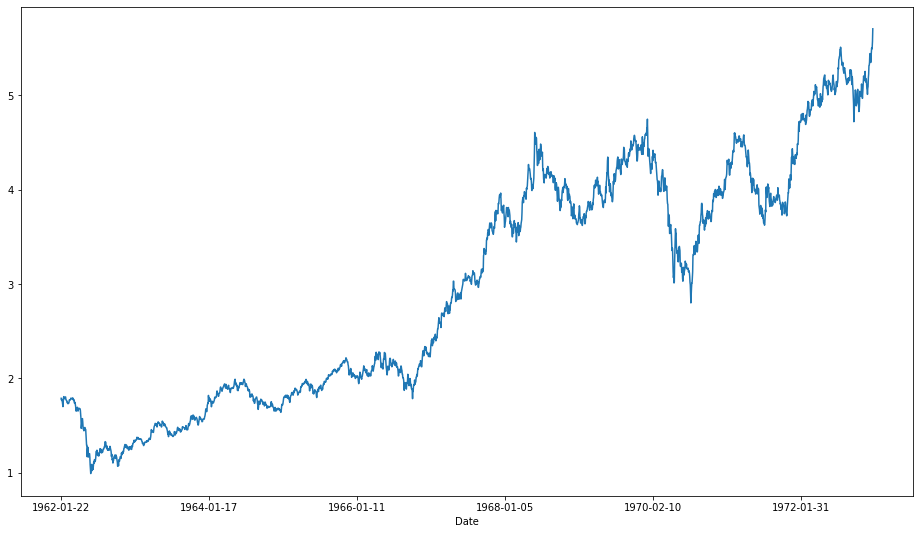

In [3]:
ibm['Adj Close'].plot(figsize=(16,9));

## Building a class to pull data for multiple tickers

In [4]:
class Tickers():
    def __init__(self, 
                 tickers, 
                 start = '1/1/1900', 
                 end = datetime.date.today().strftime('%m/%d/%Y') , 
                 freq = "d"):
        
        # Defining the ticker
        self.tickers = tickers
        # Defining the type of data to collect
        self.freq = freq
        # Defining the url to query
        self.url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1{}&events=history&includeAdjustedClose=true"
        # Defining the starting timestamp
        # Since many companies went public before 1970, I need a method to convert the date into a negative timestamp
        # TODO // Fix this mess. Not sure if I should use a constructor or not?
        # Start Time
        epoch = datetime.datetime(1970, 1, 1)  # calculate the epoch timestamp 
        month, day, year = start.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.start = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        # End Time
        month, day, year = end.split("/") #  extract date info from the string
        t = datetime.datetime(int(year), int(month), int(day)) # Convert the date info to a timestamp
        diff = t-epoch  # Subtract the difference to find how mahy years, months, and days need to be subtracted/added
        self.end = diff.days * 24 * 60 * 60  # Finding the number of seconds to calculate the timestamp
        
    def get_prices(self):
        df = pd.DataFrame()
        for i in self.tickers:
            stock_price = pd.read_csv(self.url.format(i,
                                                  self.start,
                                                  self.end,
                                                  self.freq), index_col=0 )
            
            stock_price['PctChange'] = stock_price['Adj Close'].pct_change()
            stock_price['CumulativePctChange'] = stock_price['Adj Close'].pct_change().cumsum()
            stock_price['Ticker'] = i
            df = pd.concat([df, stock_price])
            
        # Reordering the column names
        cols = df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        df = df[cols]
        return df

In [5]:
faang = Tickers(tickers = ['FB','AAPL','AMZN','NFLX','GOOG'], 
           start = "1/1/2010", 
           freq = "d").get_prices()

In [6]:
faang

,Ticker,Open,High,Low,Close,Adj Close,Volume,PctChange,CumulativePctChange
Date,,,,,,,,,
2012-05-18,FB,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN
2012-05-21,FB,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.109861,-0.109861
2012-05-22,FB,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.089039,-0.198900
2012-05-23,FB,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.032258,-0.166642
2012-05-24,FB,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.032187,-0.134455
...,...,...,...,...,...,...,...,...,...
2021-01-11,GOOG,1786.069946,1794.314941,1760.520020,1766.719971,1766.719971,1209700,-0.022405,2.104253
2021-01-12,GOOG,1753.920044,1778.040039,1725.310059,1746.550049,1746.550049,1357700,-0.011417,2.092836
2021-01-13,GOOG,1738.579956,1765.035034,1738.010010,1754.400024,1754.400024,1094100,0.004495,2.097331


In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

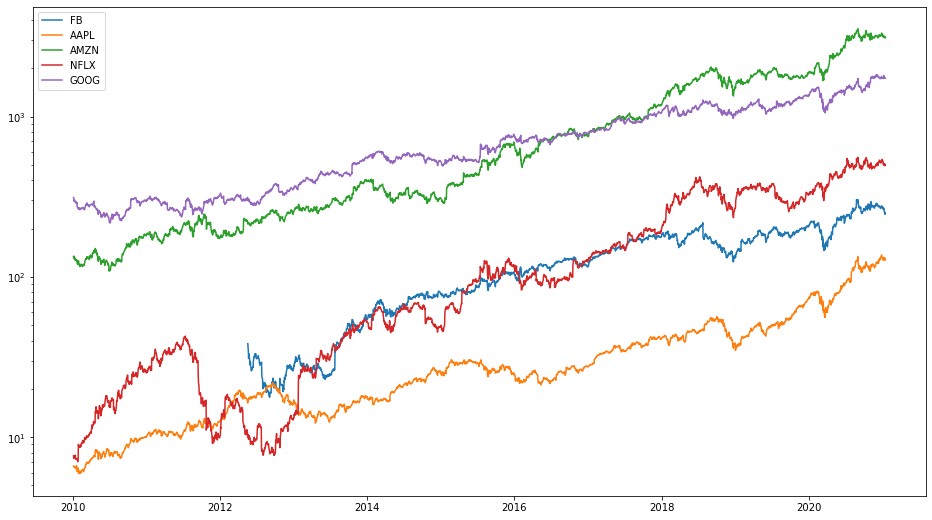

In [8]:
plt.figure(figsize=(16,9))
for i in faang['Ticker'].unique():
    subset = faang[faang['Ticker'] == i]
    plt.plot(pd.to_datetime(subset.index), subset['Adj Close'])
    plt.yscale("log")

plt.legend(labels = faang['Ticker'].unique())    
plt.show()

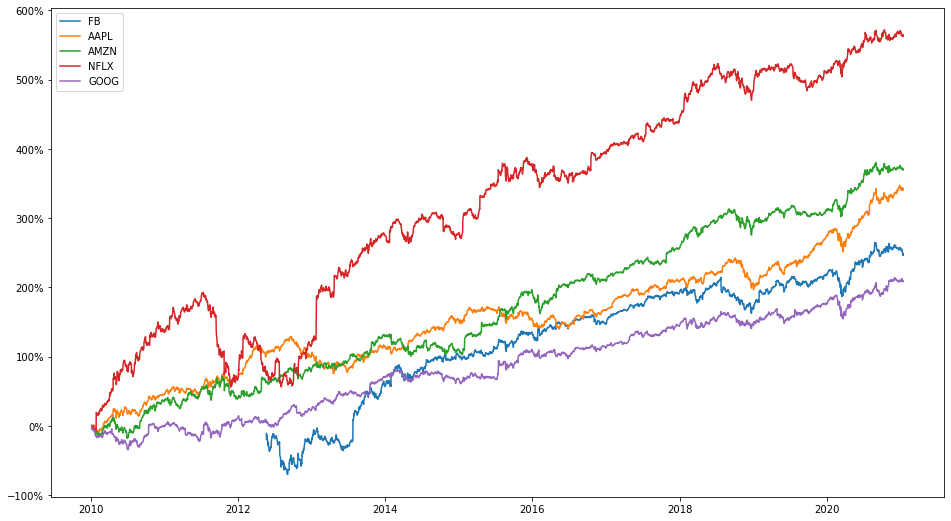

In [9]:
plt.figure(figsize=(16,9))
for i in faang['Ticker'].unique():
    subset = faang[faang['Ticker'] == i]
    plt.plot(pd.to_datetime(subset.index), subset['CumulativePctChange'])

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend(labels = faang['Ticker'].unique())    
plt.show()

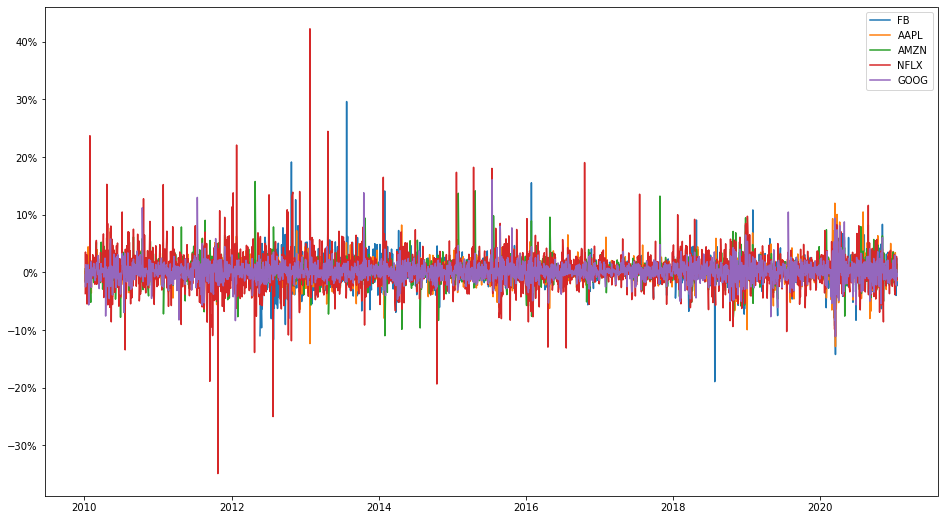

In [10]:
plt.figure(figsize=(16,9))
for i in faang['Ticker'].unique():
    subset = faang[faang['Ticker'] == i]
    plt.plot(pd.to_datetime(subset.index), subset['PctChange'])
    
plt.legend(labels = faang['Ticker'].unique())    
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

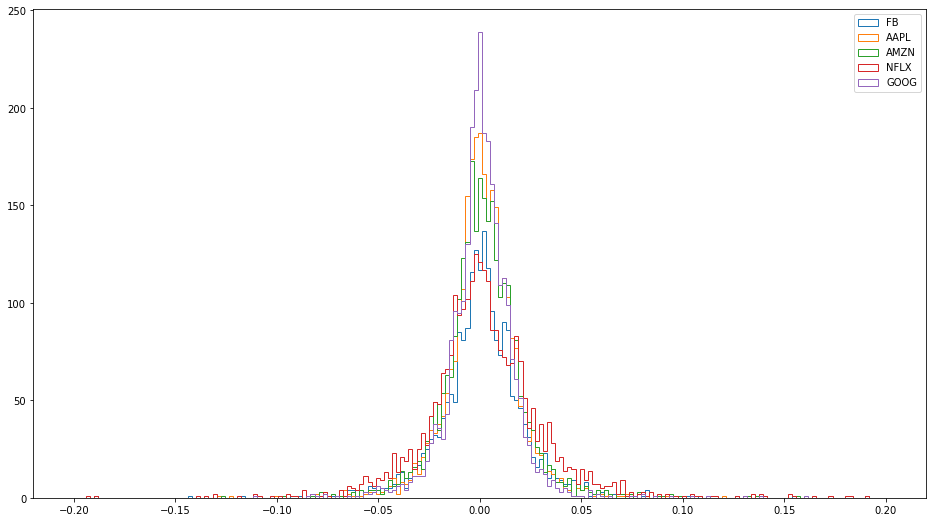

In [11]:
plt.figure(figsize=(16,9))
for i in faang['Ticker'].unique():
    subset = faang[faang['Ticker'] == i][1:]
    plt.hist(subset['PctChange'], bins = np.linspace(-0.2,0.2, 200), histtype="step")
    
plt.legend(labels = faang['Ticker'].unique())
plt.show()

## Pulling another flat dataset for info on companies

This will technically count as web scraping, but I wanted to also create a dataframe containing info relating to what sectors these companies are in as well as their market cap.

In [12]:
from IPython.display import clear_output
import requests

class AllCompanies():
    def __init__(self):
        self.header = { "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 \
        (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36", 
                  "X-Requested-With": "XMLHttpRequest" }
        self.url = "https://finviz.com/screener.ashx?v=111"
        
    def get_data(self, debug=False):
        df = pd.DataFrame()
        for i in np.arange(1,7621, 20):
            self.url = "https://finviz.com/screener.ashx?v=111"
            if debug == True:
                clear_output(wait=True)
                print("{:.2f}% Complete".format((i/7601) * 100))
            self.url = self.url + "&r={}".format(i)
            html_page_text = requests.get(self.url, headers=self.header);
            temp = pd.DataFrame(pd.read_html(html_page_text.text, na_values="-")[14])
            new_header = temp.iloc[0] #grab the first row for the header
            temp = temp[1:] #take the data less the header row
            temp.columns = new_header #set the header row as the df header
            df = pd.concat([df,temp])
        return df

In [13]:
df = AllCompanies().get_data(debug=True)

100.00% Complete


In [14]:
df

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
1,1,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA,38.67B,54.83,126.21,0.14%,2114804
2,2,AA,Alcoa Corporation,Basic Materials,Aluminum,USA,4.67B,NaN,23.28,-7.21%,5853172
3,3,AAAU,Goldman Sachs Physical Gold ETF,Financial,Exchange Traded Fund,USA,NaN,NaN,18.18,-1.20%,333501
4,4,AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China,40.00M,NaN,1.26,0.00%,109112
5,5,AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA,789.70M,NaN,10.90,-1.54%,1639429
...,...,...,...,...,...,...,...,...,...,...,...
6,7606,ZUO,"Zuora, Inc.",Technology,Software - Infrastructure,USA,1.64B,NaN,13.41,-2.61%,1274169
7,7607,ZVO,Zovio Inc,Consumer Defensive,Education & Training Services,USA,168.31M,NaN,5.41,3.44%,176627
8,7608,ZYME,Zymeworks Inc.,Healthcare,Biotechnology,Canada,2.54B,NaN,54.68,-1.35%,316585
9,7609,ZYNE,"Zynerba Pharmaceuticals, Inc.",Healthcare,Drug Manufacturers - Specialty & Generic,USA,107.48M,NaN,3.59,-1.64%,1278903


In [15]:
import numpy as np

def string_to_int(string):
    multipliers = {'K':1000, 'M':1000000, 'B':1000000000, 'T':1000000000000}
    if pd.isnull(string):
        return np.nan
    if str(string)[-1].isdigit(): # check if no suffix
        return int(string)
    mult = multipliers[string[-1]] # look up suffix to get multiplier
     # convert number to float, multiply by multiplier, then make int
    return int(float(string[:-1]) * mult)

In [16]:
df['Market Cap'] = df['Market Cap'].apply(string_to_int)
df

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
1,1,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA,3.867000e+10,54.83,126.21,0.14%,2114804
2,2,AA,Alcoa Corporation,Basic Materials,Aluminum,USA,4.670000e+09,NaN,23.28,-7.21%,5853172
3,3,AAAU,Goldman Sachs Physical Gold ETF,Financial,Exchange Traded Fund,USA,NaN,NaN,18.18,-1.20%,333501
4,4,AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China,4.000000e+07,NaN,1.26,0.00%,109112
5,5,AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA,7.897000e+08,NaN,10.90,-1.54%,1639429
...,...,...,...,...,...,...,...,...,...,...,...
6,7606,ZUO,"Zuora, Inc.",Technology,Software - Infrastructure,USA,1.640000e+09,NaN,13.41,-2.61%,1274169
7,7607,ZVO,Zovio Inc,Consumer Defensive,Education & Training Services,USA,1.683100e+08,NaN,5.41,3.44%,176627
8,7608,ZYME,Zymeworks Inc.,Healthcare,Biotechnology,Canada,2.540000e+09,NaN,54.68,-1.35%,316585
9,7609,ZYNE,"Zynerba Pharmaceuticals, Inc.",Healthcare,Drug Manufacturers - Specialty & Generic,USA,1.074800e+08,NaN,3.59,-1.64%,1278903


In [17]:
df[df['Market Cap'] == np.max(df['Market Cap'])]

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
15,15,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2.168690e+12,38.92,127.14,-1.37%,110887469


In [18]:
df = df.drop(['P/E', 'Price', 'Change', 'Volume'], axis=1)

In [19]:
df.sort_values(['Market Cap'], ascending=False)[:20]

,No.,Ticker,Company,Sector,Industry,Country,Market Cap
15,15,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2.168690e+12
10,4530,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,1.610540e+12
6,326,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,USA,1.569200e+12
2,2942,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1.191830e+12
3,2943,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1.173900e+12
2,6822,TSLA,"Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,USA,7.831200e+11
18,2338,FB,"Facebook, Inc.",Communication Services,Internet Content & Information,USA,6.996600e+11
1,601,BABA,Alibaba Group Holding Limited,Consumer Cyclical,Internet Retail,China,6.574200e+11
18,898,BRK-B,Berkshire Hathaway Inc.,Financial,Insurance - Diversified,USA,5.673800e+11
17,897,BRK-A,Berkshire Hathaway Inc.,Financial,Insurance - Diversified,USA,5.500000e+11


In [20]:
print(list(df[(df['Sector'] == "Technology") & 
        (df['Industry'] == "Semiconductor Equipment & Materials")]['Ticker'].values))

['ACLS', 'ACMR', 'AEHR', 'AMAT', 'AMBA', 'ASML', 'ASYS', 'ATOM', 'AXTI', 'BRKS', 'CAMT', 'CCMP', 'COHU', 'DQ', 'EMAN', 'ENTG', 'ICHR', 'IPGP', 'KLAC', 'KLIC', 'LRCX', 'NVMI', 'OLED', 'PLAB', 'RBCN', 'TER', 'TRT', 'UCTT', 'VECO', 'XPER']


In [21]:
semis = Tickers(tickers = list(df[(df['Sector'] == "Technology") & 
                                       (df['Industry'] == "Semiconductor Equipment & Materials")]['Ticker'].values), 
           start = "1/1/2010", 
           freq = "d").get_prices()

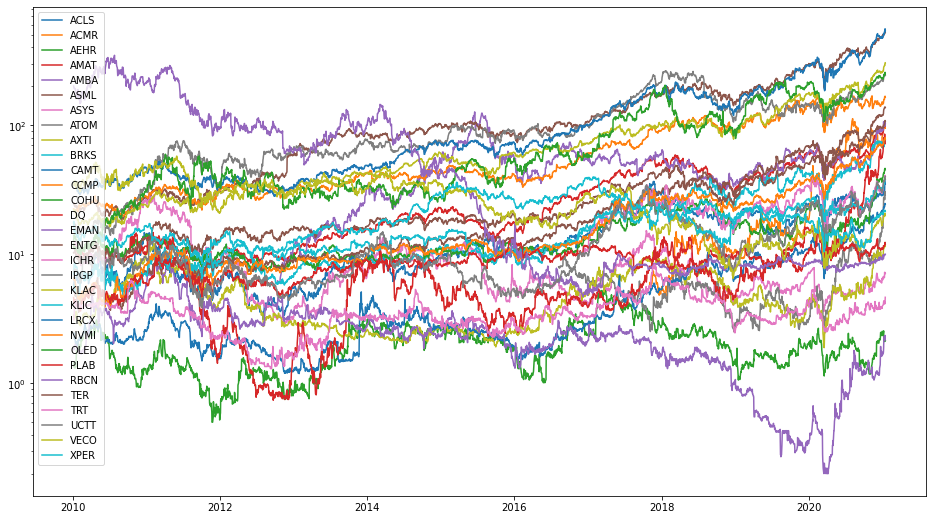

In [23]:
plt.figure(figsize=(16,9))
for i in semis['Ticker'].unique():
    subset = semis[semis['Ticker'] == i]
    plt.plot(pd.to_datetime(subset.index), subset['Adj Close'])
    plt.yscale("log")

plt.legend(labels = semis['Ticker'].unique())    
plt.show()

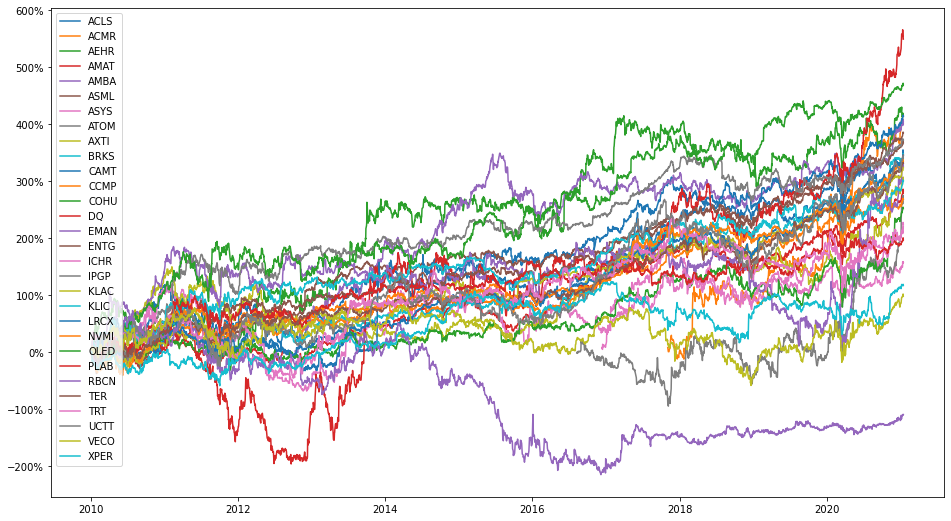

In [24]:
plt.figure(figsize=(16,9))
for i in semis['Ticker'].unique():
    subset = semis[semis['Ticker'] == i]
    plt.plot(pd.to_datetime(subset.index), subset['CumulativePctChange'])

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend(labels = semis['Ticker'].unique())    
plt.show()

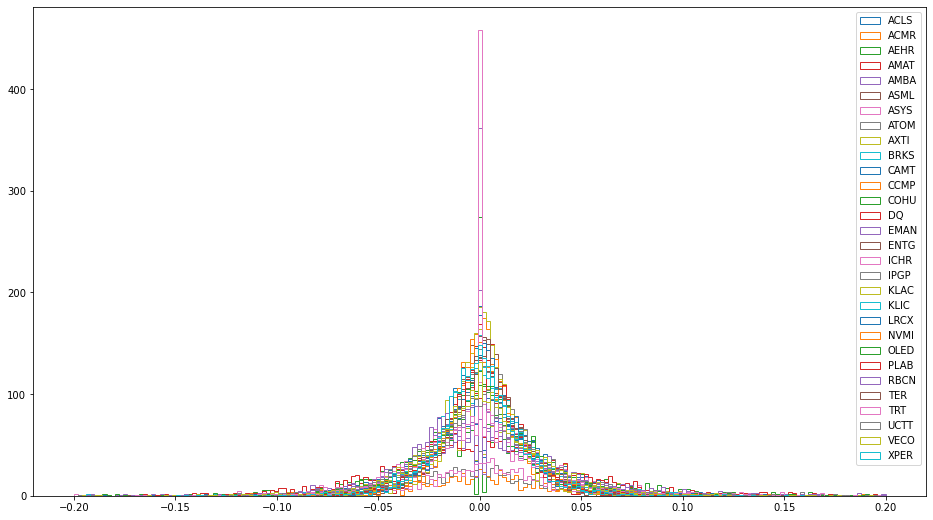

In [25]:
plt.figure(figsize=(16,9))
for i in semis['Ticker'].unique():
    subset = semis[semis['Ticker'] == i][1:]
    plt.hist(subset['PctChange'], bins = np.linspace(-0.2,0.2, 200), histtype="step")
    
plt.legend(labels = semis['Ticker'].unique())
plt.show()